In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/28/17t2t7cj4x17kf4plwsxyf_00000gr/T/ipykernel_72604/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Grad-Shafranov eq:

$$
\begin{aligned}
\Delta^{*} \psi & \equiv\left(R \frac{\partial}{\partial R} \frac{1}{R} \frac{\partial}{\partial R}+\frac{\partial^{2}}{\partial Z^{2}}\right) \psi \\
&= {-\mu_{0}R^2 P^{\prime}(\psi)}{- F F^{\prime}(\psi)} 
\end{aligned}
$$



In [ ]:

df_jet_wall = pd.read_csv(
    "jet_wall.csv",
    header=None,
    delim_whitespace=True,
)


df_psi_coords = pd.read_csv(
    "psi_coordinates.csv",
)

R = df_psi_coords.PSIR
Z = df_psi_coords.PSIZ

R_mesh, Z_mesh = np.meshgrid(R, Z)

/var/folders/28/17t2t7cj4x17kf4plwsxyf_00000gr/T/ipykernel_72604/2730029160.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_jet_wall = pd.read_csv(


Adding columns back in!

In [ ]:
df_equilibria = pd.read_csv("v_results.csv",header=None,index_col=0,nrows=30)

In [ ]:
df_equilibria.columns = (
    [f"psi_true_{i+1}" for i in range(1089)]
    + [f"psi_pred_{i+1}" for i in range(1089)]
    + [f"pff_true_{i+1}" for i in range(1089)]
    + [f"pff_pred_{i+1}" for i in range(1089)]
    + [f"gs_true_{i+1}" for i in range(1089)]
    + [f"gs_pred_{i+1}" for i in range(1089)]
)

In [ ]:
df_equilibria.iloc[10][[f"psi_true_{i+1}" for i in range(1089)]]

psi_true_1      -0.722797
psi_true_2      -0.725451
psi_true_3      -0.727796
psi_true_4      -0.730267
psi_true_5      -0.733021
                   ...   
psi_true_1085   -0.750182
psi_true_1086   -0.745128
psi_true_1087   -0.739553
psi_true_1088   -0.733471
psi_true_1089   -0.726905
Name: 10, Length: 1089, dtype: float64

In [ ]:
def plot_grid(row, name):

    cols = [f"{name}{i+1}" for i in range(1089)]

    grid_values = row[cols]

    single_pulse_true = np.array(grid_values)
    single_pulse_true = single_pulse_true.reshape(33, 33)

    plt.contour(
        R, Z, single_pulse_true, colors="blue", alpha=0.4,
    )
    plt.plot(
        np.array(df_jet_wall)[:, 0],
        np.array(df_jet_wall)[:, 1],
        linewidth=4,
        color="black",
        label="tokamak",
    )
    plt.axis("equal")
    plt.xlabel("R")
    plt.ylabel("Z")
    plt.title(str(name))

    plt.show()


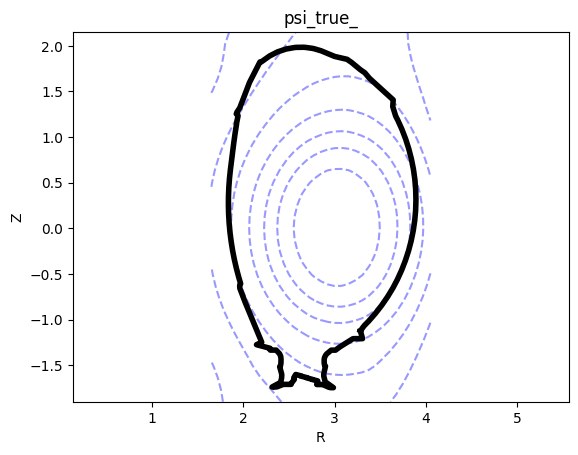

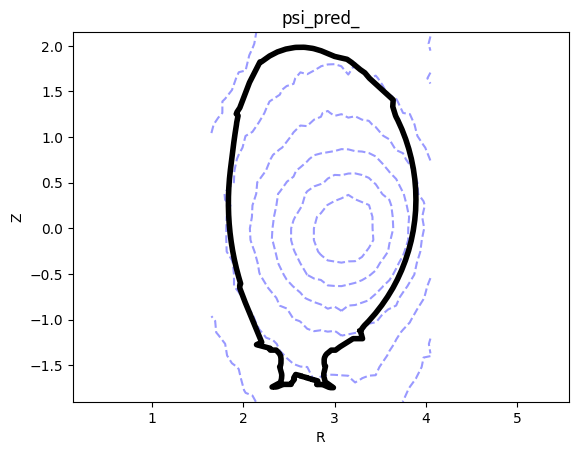

In [ ]:
# magnetic flux psi

plot_grid(df_equilibria.iloc[0], "psi_true_")
plot_grid(df_equilibria.iloc[0], "psi_pred_")

In [ ]:
df_equilibria.iloc[0].shape

(6534,)

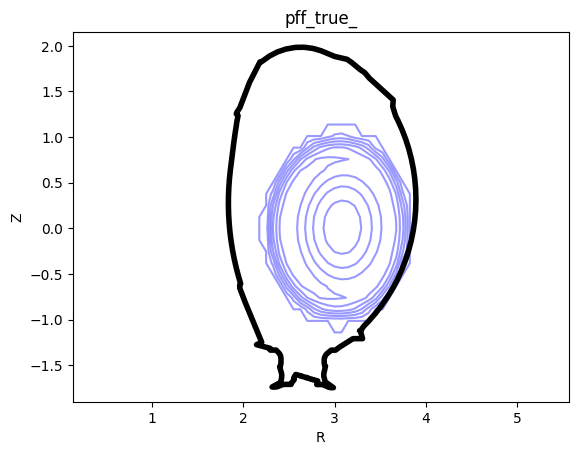

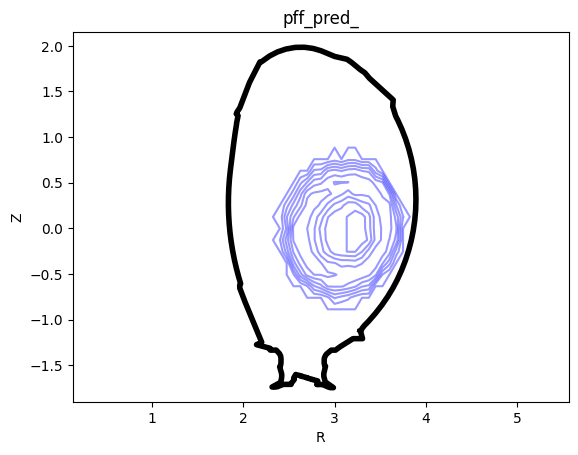

In [ ]:
# RHS of GS equation, function with P(psi), FF'(psi)

plot_grid(df_equilibria.iloc[0], "pff_true_")
plot_grid(df_equilibria.iloc[0], "pff_pred_")

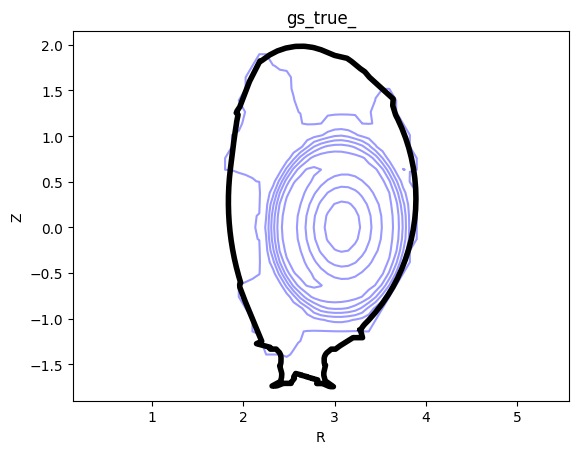

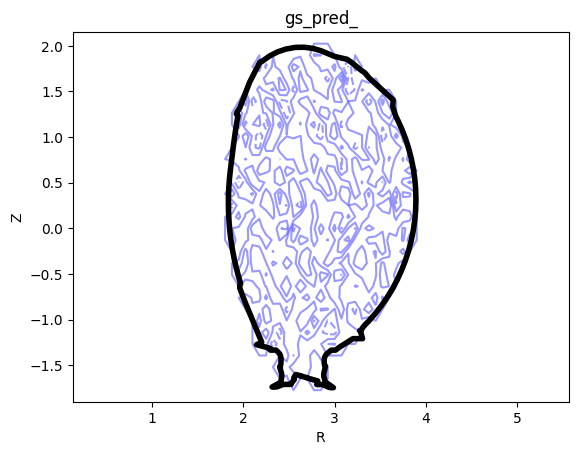

In [ ]:
# LHS of GS equation, delta operator in R and Z

plot_grid(df_equilibria.iloc[0], "gs_true_")
plot_grid(df_equilibria.iloc[0], "gs_pred_")